In [1]:
from simsopt._core import load
# replace "NAME_OF_FILE_YOU_DOWNLOADED" with the name you gave the file
surfaces, ma, coils = load(f'serial0928241.json')

In [ ]:
from mayavi import mlab

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [2]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [ ]:
surf = surf_from_coils(coils, ncoils=2, mpol=3, ntor=3)

In [ ]:
surf.plot(engine='mayavi', show=False)
mlab.show()

In [3]:
from simsopt.geo import SurfaceRZFourier
s = SurfaceRZFourier.from_nphi_ntheta(
    mpol=5,
    ntor=5,
    stellsym=True,
    nfp=3,
    range="full torus",
    nphi=64,
    ntheta=24,
)
s.fit_to_curve(ma, 0.7, flip_theta=False)

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

s.plot(engine='mayavi', show=False)
mlab.show()

In [ ]:
from simsopt.geo import SurfaceScaled
surf = SurfaceScaled(surfaces[0])
#surf.update_fixed()
surf = surf.to_RZFourier()

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

surf.plot(engine='mayavi', show=False)
mlab.show()

In [4]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=3, coils=coils, interpolate=True, surf=s) # ncoils=2, mpol=5, ntor=5, n=40, h=0.05)

In [ ]:
ps.surfclassifier.__dict__

In [25]:
import numpy as np

In [97]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 4
Rs = np.linspace(0.884, 1.2, nfieldlines)
Zs = np.zeros_like(Rs)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 60
p1 = np.array([1.09955, 0.0712])
p2 = np.array([1.4016, 0.1072])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
# Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

nfieldlines = 10
p1 = np.array([1.385, 0.])
p2 = np.array([1.526, 0.])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

nfieldlines = 10
p1 = np.array([1.4446, 0.])
p2 = np.array([1.4822, 0.])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

In [ ]:
ps._mf_B.estimate_error_B(10000)

In [27]:
from horus import poincare

In [98]:
pplane = poincare(ps._mf_B, RZs, phis, ps.surfclassifier, tol = 1e-10, plot=False)

In [99]:
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use('lateky')

In [100]:
plt.ioff()
fig, ax = pplane.plot(phis)
ax = ax[0,0]

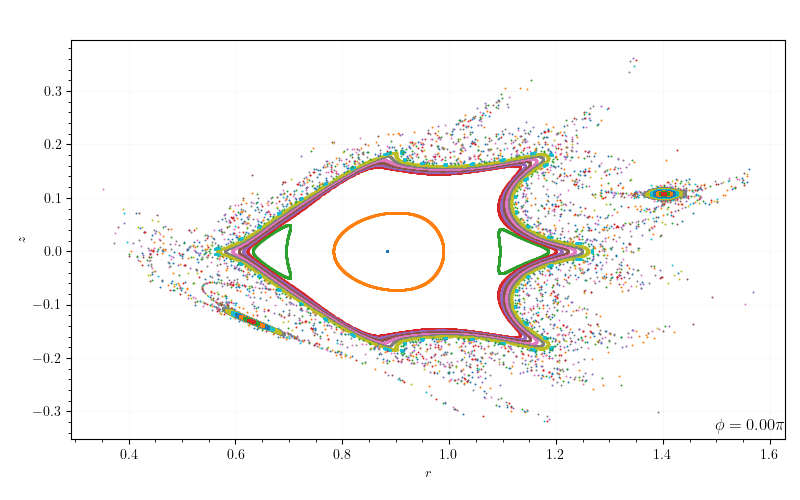

In [101]:
display(fig.canvas)

In [96]:
fp11_1.x

array([1.44463556, 1.34629562, 1.0644657 , 0.37268203, 1.0644657 ,
       1.34629562, 1.44463556])

In [83]:
mp.tunrstile_area()

2024-05-29 13:50:27 [info     ] Forward integration goes beyond stable saddle point.
2024-05-29 13:50:27 [debug    ] rfp: [ 1.43378117 -0.05140443], rz_end: [ 1.45838009 -0.04227938], rz: [ 1.43620375 -0.05057199]
2024-05-29 13:50:44 [info     ] Backward integration goes beyond stable saddle point.
2024-05-29 13:50:44 [debug    ] rfp: [1.43378117 0.05140443], rz_end: [1.45832003 0.04230331], rz: [1.43619751 0.05057418]
2024-05-29 13:50:44 [info     ] Potential integration completed for homo/hetero-clinic point of order : 1.277e-03
2024-05-29 13:51:01 [info     ] Forward integration goes beyond stable saddle point.
2024-05-29 13:51:01 [debug    ] rfp: [ 1.43378117 -0.05140443], rz_end: [ 1.45322055 -0.04430188], rz: [ 1.43564426 -0.05073967]
2024-05-29 13:51:19 [info     ] Backward integration goes beyond stable saddle point.
2024-05-29 13:51:19 [debug    ] rfp: [1.43378117 0.05140443], rz_end: [ 1.53410114 -0.01022141], rz: [1.45319293 0.04431256]
2024-05-29 13:51:19 [info     ] Potent

array([ 0.00053154, -0.00053154])

In [90]:
mp.inner["areas"]

array([[ 0.00053154,  0.00096668,  0.00101403],
       [-0.00053154,  0.00096668,  0.00101403]])

In [89]:
mp.inner["rfp_s"]

array([ 1.43378117, -0.05140443])

In [87]:
mp.inner["clinic_history"]

[[[array([ 1.42231533, -0.04468045]),
   array([ 1.4326794 , -0.05075925]),
   array([ 1.43390722, -0.05128335]),
   array([ 1.43620375, -0.05057199])],
  [array([1.42231532, 0.04468045]),
   array([1.43267934, 0.05075927]),
   array([1.43390663, 0.05128356]),
   array([1.43619751, 0.05057418])]],
 [[array([ 1.39322876, -0.02706297]),
   array([ 1.42935505, -0.0488127 ]),
   array([ 1.43353643, -0.05111301]),
   array([ 1.43564426, -0.05073967])],
  [array([1.42935503, 0.04881271]),
   array([1.43353617, 0.0511131 ]),
   array([1.43564146, 0.05074065]),
   array([1.45319293, 0.04431256])]]]

In [68]:
fp11_x1.GreenesResidue

-2.161866614284141

In [69]:
fp11_x2.GreenesResidue

-2.161866615353276

In [5]:
from pyoculus.problems import FixedPoint

In [6]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-15
pparams['niter'] = 100
# pparams["Z"] = 0 

fp11_o1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o1.compute(guess=[1.4446355574662593, 0.0], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

fp11_o2 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o2.compute(guess=[1.346295615988142, 0.2133036397909969], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-1.00364161e-12 -5.99894591e-13] - dtheta : 12.566370920451874
0 - [DeltaR, DeltaZ] : [3.61932706e-14 1.47937218e-14] - dtheta : 12.566370964047485


In [42]:
fp11_x1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_x1.compute(guess=[1.43378117, 0.05140443], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-1.39825924e-08 -8.58280832e-09] - dtheta : 12.566370947288604
0 - [StepR, StepZ]: [1.97670325e-09 7.20732508e-10]
1 - RZ : [1.43378117 0.05140443] - rhotheta : [0.55189699 0.09327655]
1 - [DeltaR, DeltaZ] : [1.20126131e-13 7.72715225e-14] - dtheta : 12.566370930405808


In [46]:
fp11_x2 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_x2.compute(guess=[1.43378117, -0.05140443], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-3.11180548e-09 -2.35059910e-09] - dtheta : 12.566370919085667
0 - [StepR, StepZ]: [ 1.97677408e-09 -7.20685921e-10]
1 - RZ : [ 1.43378117 -0.05140443] - rhotheta : [ 0.55189699 -0.09327655]
1 - [DeltaR, DeltaZ] : [1.2345680e-13 4.7545301e-14] - dtheta : 12.566370914336135


In [47]:
for fp in [fp11_x1, fp11_x2]:
    results11 = [list(p) for p in zip(fp.x, fp.y, fp.z)]
    for rr in results11:
        ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)


In [51]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp11_x2, fp11_x1, integrator_params=iparam)

In [62]:
mp.choose(signs=[[1, 1],[1, -1]])

In [63]:
mp.inner

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([ 1.43378117, -0.05140443]),
 'lambda_s': 0.09476244179134569,
 'vector_s': array([-0.86294613,  0.50529594]),
 'rfp_u': array([1.43378117, 0.05140443]),
 'lambda_u': 10.55270401538397,
 'vector_u': array([-0.86294613, -0.50529594])}

In [64]:
mp.outer

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([1.43378117, 0.05140443]),
 'lambda_s': 0.09476244175259474,
 'vector_s': array([ 0.94488957, -0.32738922]),
 'rfp_u': array([ 1.43378117, -0.05140443]),
 'lambda_u': 10.552704019621759,
 'vector_u': array([0.94488957, 0.32738922])}

In [71]:
mp.onworking = mp.inner

In [66]:
mp.compute(nintersect = 4, epsilon=1e-6, neps = 20, directions="inner")

2024-05-29 13:30:41 [info     ] Computing manifold for directions [inner/outer/both]: inner
2024-05-29 13:30:42 [info     ] Computing unstable manifold...
2024-05-29 13:31:16 [info     ] Computing stable manifold...


In [67]:
mp.plot(ax=ax)

2024-05-29 13:32:36 [warning  ] Manifold os not computed.
2024-05-29 13:32:36 [warning  ] Manifold ou not computed.


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

In [75]:
mp.find_clinic_single()

2024-05-29 13:40:10 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.02744e-03
2024-05-29 13:40:19 [info     ] Search for minimum of the linear error succeeded, epsilon = 1.02385e-03
2024-05-29 13:40:21 [debug    ] Guess - 0.004893529543585944, 0.00487735159584226
2024-05-29 13:40:21 [debug    ] Bounds - ((0.0010274401732290207, 0.01081449926040091), (0.0010238451750611058, 0.010778548366745626))
2024-05-29 13:40:21 [debug    ] n_s, n_u - 2, 2
2024-05-29 13:40:21 [debug    ] Inside : (0.004893529543585944, 0.0048773515958422595)
2024-05-29 13:40:22 [debug    ] Returns - (array([1.38840275, 0.02747634]), array([ 1.38806924, -0.02750158]), array([0.00033352, 0.05497792]))
2024-05-29 13:40:22 [debug    ] Inside : (0.004893529543585944, 0.0048773515958422595)
2024-05-29 13:40:25 [debug    ] Returns - (array([1.38840275, 0.02747634]), array([ 1.38806924, -0.02750158]), array([0.00033352, 0.05497792]))
2024-05-29 13:40:25 [debug    ] Inside : (0.004893529543585944, 0

(0.001276810579762792, 0.0012768113453997163)

In [79]:
mp.find_clinic_single(0.005129109370459298, 0.0051291087795083574, n_s=2, n_u = 1, tol=1e-8)

2024-05-29 13:48:37 [debug    ] Guess - 0.005129109370459298, 0.0051291087795083574
2024-05-29 13:48:37 [debug    ] Bounds - ((0.005129109370459298, 0.04729699487764893), (0.0051291087795083574, 0.04729699431598403))
2024-05-29 13:48:37 [debug    ] n_s, n_u - 2, 1
2024-05-29 13:48:37 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-29 13:48:38 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-29 13:48:38 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-29 13:48:40 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-29 13:48:40 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-29 13:48:41 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-29 13:48:41 [deb

(0.00512910928143146, 0.005129109111296845)

In [78]:
mp.find_clinics(n_points=2)

2024-05-29 13:46:36 [info     ] Initial guess: [0.004091748505791292, 0.0041477121762982]
2024-05-29 13:46:37 [debug    ] Guess - 0.004091748505791292, 0.0041477121762982
2024-05-29 13:46:37 [debug    ] Bounds - ((0.001276810579762792, 0.013292014643333946), (0.0012768113453997163, 0.0012768113453997163))
2024-05-29 13:46:37 [debug    ] n_s, n_u - 2, 1
2024-05-29 13:46:37 [debug    ] Inside : (0.004091748505791293, 0.0041477121762982004)
2024-05-29 13:46:38 [debug    ] Returns - (array([1.37191764, 0.02800045]), array([1.39991985, 0.03122224]), array([-0.02800221, -0.00322179]))
2024-05-29 13:46:38 [debug    ] Inside : (0.004091748505791293, 0.0041477121762982004)
2024-05-29 13:46:40 [debug    ] Returns - (array([1.37191764, 0.02800045]), array([1.39991985, 0.03122224]), array([-0.02800221, -0.00322179]))
2024-05-29 13:46:40 [debug    ] Inside : (0.004091748505791293, 0.0041477121762982004)
2024-05-29 13:46:41 [debug    ] Returns - (array([1.37191764, 0.02800045]), array([1.39991985, 0

ValueError: Homoclinic search not successful.

In [ ]:
import horus as ho

In [ ]:
gamma = ho.trace(ps._mf, 9*2*np.pi, [0.73, 0, 0.07], tol=1e-10)[0]

In [ ]:
mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [ ]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-15
pparams['niter'] = 100

fp1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp2 = FixedPoint(ps, pparams, integrator_params=iparams)

In [ ]:
fp1.compute(guess=[0.73, 0.07], pp=3, qq=6, sbegin=0.6, send=1.2, checkonly=True)

In [ ]:
fp2.compute(guess=[1.14374773, 0.0203871], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

In [ ]:
results1 = [list(p) for p in zip(fp1.x, fp1.y, fp1.z)]
# results2 = [list(p) for p in zip(fp2.x, fp2.y, fp2.z)]

In [ ]:
results1

In [ ]:
results2

In [ ]:
gamma = ho.trace(ps._mf, 9*2*np.pi, results1[0], tol=1e-10)[0]

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [ ]:
for rr in results1:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

# for rr in results2:
#     ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [ ]:
ax.scatter(results1[0][0], results1[0][2], marker="X", edgecolors="black", linewidths=1)
ax.scatter(results2[0][0], results2[0][2], marker="X", edgecolors="black", linewidths=1)

In [ ]:
fig

It is a $q=6/3$ 

In [ ]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp1, integrator_params=iparam)

In [ ]:
mp.choose(2, 3, stability=["u", "s"], signs=[-1, 1])

In [ ]:
mp.directions = "u+s+"

In [ ]:
mp.compute(nintersect = 30, epsilon= 1e-3, neps = 20)

In [ ]:
mp.plot(ax=ax)

In [ ]:
fig

In [ ]:
mp.find_epsilon(mp.rfp_s, mp.vector_s, eps_guess = 1e-4, direction=-1)

In [ ]:
mp.find_homoclinic(1e-3, 1e-3, n_s=3, n_u=38, jac=False)

In [ ]:
fund = mp.fundamental_segment
guess_i = [fund[0][1]*np.power(mp.lambda_s, 1/2), fund[1][0]*np.power(mp.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

In [ ]:
mp.find_homoclinic(*guess_i, n_s=3, n_u=37, jac=False)

In [ ]:
mp.clinics

In [81]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(mp.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]
    
    n_u = 4
    hu_i = mp.integrate(mp.onworking["rfp_u"] + eps_u_i * mp.onworking["vector_u"], n_u, 1)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
fig

In [ ]:
areas, potential_integrations, history = mp.resonance_area()

In [ ]:
mp.areas

In [ ]:
mp.areas[:, 0].sum()

In [ ]:
potential_integrations

In [ ]:
fig_conv, ax_conv = plt.subplots()

ar = np.zeros((2, 12))
for ii, pot in enumerate(potential_integrations):
    ns = min(len(pot[0]), len(pot[1]))
    ar[ii,:] = pot[0][1:ns]-pot[1][:ns-1]
    ax_conv.scatter(1+np.arange(ns-1), pot[0][1:ns]-pot[1][:ns-1], zorder=10)

ax_conv.set_xlabel('Iteration')
ax_conv.set_ylabel('Potential integration')

In [ ]:
fig_conv

In [ ]:
sum0 = 0
sums = np.zeros(13)
for ii, a in enumerate(ar.T):
    sum0 += a[1]-a[0]
    sums[ii] = sum0 

In [ ]:
plt.scatter(np.arange(13), sums)
plt.show()